In [1]:
import numpy as np
import bplot as bp
import pandas as pd
from scipy.stats import norm as normal
bp.LaTeX()
bp.dpi()

There's a good number of attempts to make Jupyter notebooks <d-cite key="Kluyver:2016"></d-cite> publication ready.  The goal is to NBConvert a Jupyter notebook into a Distill.pub styled article.  The workhorse is the Jinja2 <d-cite key="Ronacher:2008"></d-cite> template <code>report.tpl</code>.

<h2>NBconverting</h2>

With the file <code>report.tpl</code> in the same current directory as the notebook you want to convert, run

In [ ]:
jupyter nbconvert --to html --template report.tpl article.ipynb

<h2>Features</h2>

The title and abstract of this article are stored in this notebook's metadata.  So too are the authors, their affiliations, and the bibfile used for citations.  This notebook also makes extensive use of cell tags and cell metadata.  All of the metadata keys are subject to change
.

This is a markdown cell that has been hacked to work with citations such as <d-cite key="Kluyver:2016"></d-cite>.  An outcome of this hack is that **markdown** does not work like it *should*, but the equivalent <b>HTML</b> tags <em>will</em> work.  This goes the same for the Section headline above, which is coded with <d-code language="html">&lt;h2&gt;</d-code> tags.  Another quirk derived from this citation hack is that the citations don't show up after executing this cell within the Jupyter Notebook environment.

It is really the combination that citations and markdown that don't agree.  For instancce, *this* cell, with tag `only_md`, is perfectly happy translating markdown into HTML.

You can add marginalia too, with the key <code>margin</code>, which aligns to the previous cell.

$\LaTeX$ works inline and in display mode.

$$ F(x) = \int_{-\infty}^{x} (2\pi\sigma^2)^{-1/2} \exp{ \left\{ \frac{-(s - \mu)^2}{2\sigma^2} \right\} }ds $$

You can hide code with the cell tag `hide_code`, and Pandas' DataFrames look so so.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/roualdes/data/master/cars.csv")
df.groupby('type').agg('mean')

,price,mpgCity,passengers,weight
type,,,,
large,24.300000,18.363636,6.000000,3695.454545
midsize,27.218182,19.545455,5.136364,3400.000000
small,10.166667,29.857143,4.619048,2312.857143


Code works as expected.

In [3]:
np.pi * 3

9.42477796076938

Errors are hidden.

In [4]:
nb.pi

NameError: name 'nb' is not defined

Ouput, that otherwise prints inside a notebook, is easily hidden by storing the output into a variable and/or putting a semicolon at the end of the last line that otherwise prints the output.

In [ ]:
2 + 2;

Plots can have captions, specified via a tag named `caption` in the cell's metadata.

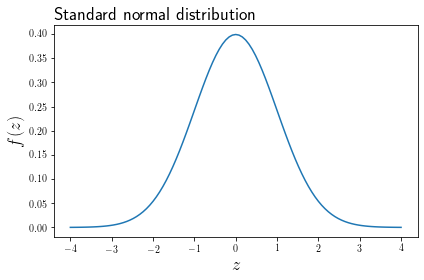

In [5]:
x = np.linspace(-4, 4, 101)
y = normal.pdf(x)
bp.curve(x, y)
bp.labels(x="$z$", y="$f(z)$", size=18)
bp.title("Standard normal distribution", size=18)
bp.save('normal.svg');

Notice that citations even work, so long as you don't break [CORS](https://developer.mozilla.org/en-US/docs/Web/HTTP/CORS) policy.  Save a URL to an HTTPS linked .bib file under key `bibfile` within the notebook's metadata and then `<d-cite key="citekey"></d-cite>` commands should work.

<h2>TODO</h2>

- resolve notebook/cell metadata keys (names)
- develop policy code shown/not shown by default; add cell tag to switch
- showcase widgets
- add distill.pub layout features
- DataFrames/tables could use some love